# The Hamblog
By Kyle Hambrook

# Correlation: Definitions and Basic Properties

We will begin our journey by studying the concept of correlation. It will lead us to many important ideas in data science.

Correlation is a measure of the association between two random variables. In this post, we give some basic definitions and properties.

### I. Covariance and Correlation

The covariance of random variables $X$ and $Y$ is 
$$
\text{Cov}(X,Y) = E[(X-E X)(Y -E Y)] = E[XY] - E[X] E[Y].
$$
The variance of $X$ is $\text{Var}(X) = \text{Cov}(X,X)$. The correlation of $X$ and $Y$ is
$$
\rho = \rho(X,Y) = \text{Corr}(X,Y) = \frac{\text{Cov}(X,Y)}{(\text{Var}(X) \text{Var}(Y))^{1/2}} = \frac{E[(X-E X)(Y -E Y)]}{\sqrt{ E[(X - E X)^2] E[(Y - E Y)^2] }},
$$
provided $\text{Var}(X)$ and $\text{Var}(Y)$ are positive. 

The Cauchy-Schwarz inequality implies $\text{Cov}(X,Y)^2 \leq \text{Var}(X) \text{Var}(Y)$, so that 
$$-1 \leq \rho \leq 1.$$

If $\text{Cov}(X,Y) = 0$, then $X$ and $Y$ are called uncorrelated. If $\text{Cov}(X,Y) > 0$, then $X$ and $Y$ are, on average, on the same side of their means (both above or both below). If $\text{Cov}(X,Y) < 0$, then $X$ and $Y$ tend to be on opposite sides of their means on average. The same remarks apply to $\rho = \text{Corr}(X,Y)$.

### II. Sample Correlation 

Let $X$ and $Y$ be random variables. 
Let $X_1,\ldots,X_n \sim_{iid} X$ and $Y_1,\ldots,Y_n \sim_{iid} Y$. In other words, $X_1,\ldots,X_n$ and $Y_1,\ldots,Y_n$ are random samples from the distributions of $X$ and $Y$, respectively.
<!--Write $\vec{X}=(X_1,\ldots,X_n)$ and $\vec{Y}=(Y_1,\ldots,Y_n)$.-->

A natural estimate for $\rho = \rho(X,Y)$ is the sample correlation (or sample correlation coefficient) 
$$
r = r_n = r_n(X,Y) = \frac{\frac{1}{n}\sum_{i=1}^{n}[(X_i - \overline{X})(Y_i -\overline{Y})]}{ \sqrt{ \frac{1}{n}\sum_{i=1}^{n} ( X_i - \overline{X})^2 \frac{1}{n}\sum_{i=1}^{n} (Y_i - \overline{Y})^2 } },
$$
where $\overline{X} = \frac{1}{n}\sum_{i=1}^{n} X_i$ and $\overline{Y} = \frac{1}{n}\sum_{i=1}^{n} Y_i$.




The Cauchy-Schwarz inequality implies 
$$-1 \leq r \leq 1.$$



The sample variance for $X$ is
$$
s_X^2= \frac{1}{n-1}\sum_{i=1}^{n} (X_i - \overline{X})^2.
$$
The sample covariance for $X$ and $Y$ is
$$
s_{XY} = \frac{1}{n-1}\sum_{i=1}^{n} (X_i - \overline{X})(Y_i - \overline{Y}).
$$

In terms of $s_X^2$, $s_Y^2$, and $s_{XY}$ we can write
\begin{align*}
r = \frac{s_{XY}}{\sqrt{s_X^2 s_Y^2}}.
\end{align*}

### III. Correlation and Independence

The correlation (and covariance) of $X$ and $Y$ is often conflated with the dependence relationship of $X$ and $Y$. This makes partial sense. If $X$ and $Y$ are independent, then $\text{Cov}(X,Y) = 0$, hence $\text{Corr}(X,Y)=0$. However the reverse implication is false, as we now demonstrate.

If $Y=X^2$ and $E[X] = E[X^3] = 0$ (for instance if the pdf of $X$ is symmetric), then 
$$
\text{Cov}(X,Y) = E[XY] - E[X] E[Y] = E[X^3] - E[X] E[X^2] = 0,
$$
even though $X$ and $Y$ are dependent. 

This example illustrates how covariance and correlation can fail to detect quadratic and higher-order dependence, thus covariance and correlation are sometimes called linear covariance and linear correlation.

### IV. Python Example: Sample Correlation and Independence
To test the relationship between correlation and independence, we'll compute the sample correlation for variables $X$ and $Y$ satisfying $Y=X^2$ and $E(X) = E(X^3) = 0$.

In [1]:
#Setup
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def CorIndPlot(X):
    Y = X**2
    mean_X = np.mean(X)
    mean_X3 = np.mean(X**3)
    mean_Y = np.mean(Y)
    #cor_x_y = np.correlate(X,Y)[0]
    r_x_y = np.mean((X-mean_X)*(Y-mean_Y)) 
    / np.sqrt(np.mean((X-mean_X)**2) 
              * np.mean((Y-mean_Y)**2)) 
    print "Sample Mean of X = ",mean_X
    print "Sample Mean of X^3 = ",mean_X3
    print "r(X,Y) = ",r_x_y
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(X,Y,"o")
    #fig.suptitle("X deterministic, Y=X^2",fontsize=15)
    ax.set_xlabel(r'$X$')
    ax.set_ylabel(r'$Y=X^2$')
    #ax.text(-3, 80, r'$\overline{X} = $'+str(mean_X),fontsize=15)

X deterministic, Y=X^2
Sample of X =  [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9  10]
Sample Mean of X =  0.0
Sample Mean of X^3 =  0.0
r(X,Y) =  5.41365893912e-15


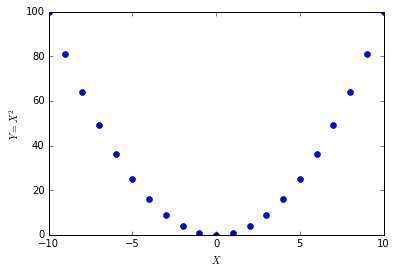

In [2]:
X = np.arange(-10,11,1)
print "X deterministic, Y=X^2"
print "Sample of X = ",X
CorIndPlot(X)

X standard normal, Y=X^2
Sample Size =  5000
Sample Mean of X =  0.0166018400812
Sample Mean of X^3 =  0.0315002951526
r(X,Y) =  0.0147520652721


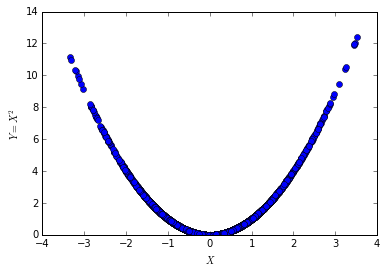

In [4]:
samplesize = 5000
X = np.random.normal(loc = 0, scale = 1, size = samplesize)
print "X standard normal, Y=X^2"
#print "Sample of X = ",X
print "Sample Size = ", samplesize
CorIndPlot(X)